## Exercise 5

In [239]:
import os
import geopandas as gpd
from  fiona import listlayers
import matplotlib.pyplot as plt
import pandas as pd 

    
### 1. Get a polygons map of the lowest administrative unit possible.

In [240]:
peruMaps = "https://github.com/IntroSpatialDataScience/MiningGDFProject2/raw/main/maps/PeMaps.gpkg"
DistExcel = "https://github.com/IntroSpatialDataScience/MiningGDFProject2/raw/main/data/dataPeru_indicadores.xlsx"

In [241]:
listlayers(peruMaps)

['country', 'dep', 'mun', 'dist']

In [242]:
peru = gpd.read_file(peruMaps,layer='country')
disMap = gpd.read_file(peruMaps,layer="dist")

In [243]:
disMap.rename(columns={'ADM3_ES':'Distrito','ADM2_ES':'Provincia','ADM1_ES':'Departamento'},inplace=True)
disMap = disMap[['Distrito','Provincia','Departamento','geometry']]
disMap.head(3)

,Distrito,Provincia,Departamento,geometry
0,Abancay,Abancay,Apurimac,"POLYGON ((-72.93158 -13.55616, -72.93140 -13.5..."
1,Abelardo Pardo Lezameta,Bolognesi,Ancash,"POLYGON ((-77.14740 -10.29675, -77.14643 -10.2..."
2,Acari,Caraveli,Arequipa,"POLYGON ((-74.61542 -15.13728, -74.61174 -15.1..."


In [244]:
disMap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [245]:
disMap=disMap.to_crs("24891")
disMap.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

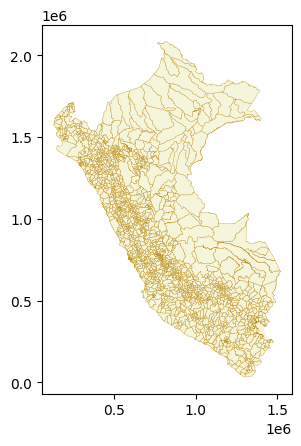

In [246]:
base = peru.plot(color='beige')
disMap.plot(ax=base, facecolor='beige', edgecolor='darkgoldenrod',linewidth=0.2)
plt.show()

    
### 2. Get a table of variables for those units. At least 3 numerical variables.

In [247]:
datadis=pd.read_excel(DistExcel,
                     dtype={'Ubigeo': object})
datadis.head(5)

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
0,010202,Amazonas,Bagua,ARAMANGO,10940,809.07,0.361182,37.545885,62.9,9.1
1,010201,Amazonas,Bagua,BAGUA,26091,150.99,0.584063,70.795501,25.4,0.7
2,010203,Amazonas,Bagua,COPALLIN,6319,99.05,0.467245,52.571361,45.4,2.1
3,010204,Amazonas,Bagua,EL PARCO,1492,18.48,0.489049,70.215409,59.9,1.5
4,010205,Amazonas,Bagua,IMAZA,24323,4430.84,0.298089,31.295719,88.4,11.7


In [248]:
disMap.head()

,Distrito,Provincia,Departamento,geometry
0,Abancay,Abancay,Apurimac,"POLYGON ((1043456.374 578809.517, 1043472.076 ..."
1,Abelardo Pardo Lezameta,Bolognesi,Ancash,"POLYGON ((589625.329 950159.105, 589731.729 95..."
2,Acari,Caraveli,Arequipa,"POLYGON ((855604.724 408148.590, 855990.585 40..."
3,Acas,Ocros,Ancash,"POLYGON ((576776.387 934936.983, 576726.618 93..."
4,Accha,Paruro,Cusco,"POLYGON ((1164542.373 533562.907, 1164551.644 ..."


### 3. Preprocess both tables and get them ready for merging.

In [249]:
datadis.rename(columns={'Educ_sec_comp2019_pct':'secundariaCompleta_pct','Viv_sin_serv_hig2017_pct':'sinServHigiene_pct'},inplace=True)
datadis = datadis[['Distrito','Provincia','Departamento','Poblacion','secundariaCompleta_pct','sinServHigiene_pct']]
datadis.Distrito = datadis.Distrito.str.title()
datadis.head()

,Distrito,Provincia,Departamento,Poblacion,secundariaCompleta_pct,sinServHigiene_pct
0,Aramango,Bagua,Amazonas,10940,37.545885,9.1
1,Bagua,Bagua,Amazonas,26091,70.795501,0.7
2,Copallin,Bagua,Amazonas,6319,52.571361,2.1
3,El Parco,Bagua,Amazonas,1492,70.215409,1.5
4,Imaza,Bagua,Amazonas,24323,31.295719,11.7


### 4. Do the merging, making the changes needed so that you keep the most columns.

In [250]:
disMap.merge(datadis,how='inner',left_on='Distrito', right_on='Distrito').head()

,Distrito,Provincia_x,Departamento_x,geometry,Provincia_y,Departamento_y,Poblacion,secundariaCompleta_pct,sinServHigiene_pct
0,Abancay,Abancay,Apurimac,"POLYGON ((1043456.374 578809.517, 1043472.076 ...",Abancay,Apurimac,56871,78.865450,2.9
1,Abelardo Pardo Lezameta,Bolognesi,Ancash,"POLYGON ((589625.329 950159.105, 589731.729 95...",Bolognesi,Ancash,1263,50.434603,25.4
2,Acari,Caraveli,Arequipa,"POLYGON ((855604.724 408148.590, 855990.585 40...",Caraveli,Arequipa,3010,56.273614,8.8
3,Acas,Ocros,Ancash,"POLYGON ((576776.387 934936.983, 576726.618 93...",Ocros,Ancash,1057,72.527156,67.6
4,Accha,Paruro,Cusco,"POLYGON ((1164542.373 533562.907, 1164551.644 ...",Paruro,Cusco,3839,64.586647,11.1


In [251]:
disMap.shape

(1873, 4)

In [252]:
datadis.shape

(1874, 6)

In [253]:
disMap.merge(datadis,how='inner',left_on='Distrito', right_on='Distrito').shape

(2222, 9)

In [254]:
# all capitals, no empty spaces before or after.

titleColumns=lambda x: x.str.title().str.strip()
datadis[['Distrito','Provincia']]=datadis[['Distrito','Provincia']].apply(titleColumns)
disMap[['Distrito','Provincia']]=disMap[['Distrito','Provincia']].apply(titleColumns)

In [255]:
disMap.merge(datadis, how='inner',left_on='Distrito', right_on='Distrito').shape

(2365, 9)

In [256]:
disMap.merge(datadis, how='inner',left_on='Distrito', right_on='Distrito').head()

,Distrito,Provincia_x,Departamento_x,geometry,Provincia_y,Departamento_y,Poblacion,secundariaCompleta_pct,sinServHigiene_pct
0,Abancay,Abancay,Apurimac,"POLYGON ((1043456.374 578809.517, 1043472.076 ...",Abancay,Apurimac,56871,78.865450,2.9
1,Abelardo Pardo Lezameta,Bolognesi,Ancash,"POLYGON ((589625.329 950159.105, 589731.729 95...",Bolognesi,Ancash,1263,50.434603,25.4
2,Acari,Caraveli,Arequipa,"POLYGON ((855604.724 408148.590, 855990.585 40...",Caraveli,Arequipa,3010,56.273614,8.8
3,Acas,Ocros,Ancash,"POLYGON ((576776.387 934936.983, 576726.618 93...",Ocros,Ancash,1057,72.527156,67.6
4,Accha,Paruro,Cusco,"POLYGON ((1164542.373 533562.907, 1164551.644 ...",Paruro,Cusco,3839,64.586647,11.1


In [257]:
datadis.Distrito.duplicated().sum(),disMap.Distrito.duplicated().sum()

(154, 153)

In [258]:
datadis['provDist']=["+".join(pd) for pd in zip (datadis.Provincia,datadis.Distrito)]
disMap['provDist']=["+".join(pd) for pd in zip (disMap.Provincia,disMap.Distrito)]

In [259]:
datadis['provDist']=datadis.provDist.str.replace("\-|\_|\s+"," ",regex=True)
disMap['provDist']=disMap.provDist.str.replace("\-|\_|\s+"," ",regex=True)

In [260]:
disMap.head()

,Distrito,Provincia,Departamento,geometry,provDist
0,Abancay,Abancay,Apurimac,"POLYGON ((1043456.374 578809.517, 1043472.076 ...",Abancay+Abancay
1,Abelardo Pardo Lezameta,Bolognesi,Ancash,"POLYGON ((589625.329 950159.105, 589731.729 95...",Bolognesi+Abelardo Pardo Lezameta
2,Acari,Caraveli,Arequipa,"POLYGON ((855604.724 408148.590, 855990.585 40...",Caraveli+Acari
3,Acas,Ocros,Ancash,"POLYGON ((576776.387 934936.983, 576726.618 93...",Ocros+Acas
4,Accha,Paruro,Cusco,"POLYGON ((1164542.373 533562.907, 1164551.644 ...",Paruro+Accha


In [261]:
nomatch_df=set(datadis.provDist)- set(disMap.provDist)
nomatch_gdf=set(disMap.provDist)-set(datadis.provDist)

In [262]:
nomatch_df

{'Andahuaylas+José María Arguedas',
 'Aymaraes+Huayllo',
 'Chupaca+San Juan De Yscos',
 'Huamanga+Andrés Avelino Cáceres Dorregaray',
 'Huanuco+Quisqui',
 'Huaraz+Pampas',
 'Leoncio Prado+Daniel Alomias Robles',
 'Nazca+Changuillo',
 'Nazca+El Ingenio',
 'Nazca+Marcona',
 'Nazca+Nazca',
 'Nazca+Vista Alegre',
 'Oxapampa+Constitución',
 'Piura+26 De Octubre',
 'Satipo+Mazamari',
 'Satipo+Pangoa',
 'Satipo+Vizcatán Del Ene',
 'Tayacaja+Santiago De Túcuma',
 'Yauyos+Ayauca'}

In [263]:
nomatch_gdf

{'Andahuaylas+Jose Maria Arguedas',
 'Aymaraes+Ihuayllo',
 'Chupaca+San Juan De Iscos',
 'Huamanga+Andres Avelino Caceres Dorregaray',
 'Huanuco+Quisqui (Kichki)',
 'Huaraz+Pampas Grande',
 'Leoncio Prado+Daniel Alomia Robles',
 'Nasca+Changuillo',
 'Nasca+El Ingenio',
 'Nasca+Marcona',
 'Nasca+Nasca',
 'Nasca+Vista Alegre',
 'Oxapampa+Constitucion',
 'Piura+Veintiseis De Octubre',
 'Satipo+Mazamari   Pangoa',
 'Satipo+Vizcatan Del Ene',
 'Tayacaja+Santiago De Tucuma',
 'Yauyos+Allauca'}

In [264]:
len(nomatch_df), len(nomatch_gdf)

(19, 18)

In [265]:
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('Andahuaylas+José María Arguedas', ('Andahuaylas+Jose Maria Arguedas', 94)),
 ('Aymaraes+Huayllo', ('Aymaraes+Ihuayllo', 97)),
 ('Chupaca+San Juan De Yscos', ('Chupaca+San Juan De Iscos', 96)),
 ('Huamanga+Andrés Avelino Cáceres Dorregaray',
  ('Huamanga+Andres Avelino Caceres Dorregaray', 95)),
 ('Huanuco+Quisqui', ('Huanuco+Quisqui (Kichki)', 90)),
 ('Huaraz+Pampas', ('Huaraz+Pampas Grande', 90)),
 ('Leoncio Prado+Daniel Alomias Robles',
  ('Leoncio Prado+Daniel Alomia Robles', 99)),
 ('Nazca+Changuillo', ('Nasca+Changuillo', 94)),
 ('Nazca+El Ingenio', ('Nasca+El Ingenio', 94)),
 ('Nazca+Marcona', ('Nasca+Marcona', 92)),
 ('Nazca+Nazca', ('Nasca+Nasca', 82)),
 ('Nazca+Vista Alegre', ('Nasca+Vista Alegre', 94)),
 ('Oxapampa+Constitución', ('Oxapampa+Constitucion', 95)),
 ('Piura+26 De Octubre', ('Piura+Veintiseis De Octubre', 87)),
 ('Satipo+Mazamari', ('Satipo+Mazamari   Pangoa', 90)),
 ('Satipo+Pangoa', ('Satipo+Vizcatan Del Ene', 86)),
 ('Satipo+Vizcatán Del Ene', ('Satipo+Vizca

In [266]:
{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'Andahuaylas+José María Arguedas': 'Andahuaylas+Jose Maria Arguedas',
 'Aymaraes+Huayllo': 'Aymaraes+Ihuayllo',
 'Chupaca+San Juan De Yscos': 'Chupaca+San Juan De Iscos',
 'Huamanga+Andrés Avelino Cáceres Dorregaray': 'Huamanga+Andres Avelino Caceres Dorregaray',
 'Huanuco+Quisqui': 'Huanuco+Quisqui (Kichki)',
 'Huaraz+Pampas': 'Huaraz+Pampas Grande',
 'Leoncio Prado+Daniel Alomias Robles': 'Leoncio Prado+Daniel Alomia Robles',
 'Nazca+Changuillo': 'Nasca+Changuillo',
 'Nazca+El Ingenio': 'Nasca+El Ingenio',
 'Nazca+Marcona': 'Nasca+Marcona',
 'Nazca+Nazca': 'Nasca+Nasca',
 'Nazca+Vista Alegre': 'Nasca+Vista Alegre',
 'Oxapampa+Constitución': 'Oxapampa+Constitucion',
 'Piura+26 De Octubre': 'Piura+Veintiseis De Octubre',
 'Satipo+Mazamari': 'Satipo+Mazamari   Pangoa',
 'Satipo+Pangoa': 'Satipo+Vizcatan Del Ene',
 'Satipo+Vizcatán Del Ene': 'Satipo+Vizcatan Del Ene',
 'Tayacaja+Santiago De Túcuma': 'Tayacaja+Santiago De Tucuma',
 'Yauyos+Ayauca': 'Yauyos+Allauca'}

In [267]:
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}
datadis.provDist.replace(changesDis_df,inplace=True)

In [268]:
disMapMerge=disMap.merge(datadis, on='provDist')
# check
disMapMerge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Distrito_x              1874 non-null   object  
 1   Provincia_x             1874 non-null   object  
 2   Departamento_x          1874 non-null   object  
 3   geometry                1874 non-null   geometry
 4   provDist                1874 non-null   object  
 5   Distrito_y              1874 non-null   object  
 6   Provincia_y             1874 non-null   object  
 7   Departamento_y          1874 non-null   object  
 8   Poblacion               1874 non-null   int64   
 9   secundariaCompleta_pct  1874 non-null   float64 
 10  sinServHigiene_pct      1874 non-null   float64 
dtypes: float64(2), geometry(1), int64(1), object(7)
memory usage: 161.2+ KB


In [269]:
disMapMerge.shape

(1874, 11)

In [270]:
disMapMerge = disMapMerge[['provDist','Provincia_y','Distrito_y','Poblacion','secundariaCompleta_pct','sinServHigiene_pct','geometry']]
disMapMerge.rename(columns={'Provincia_y':'Provincia','Distrito_y':'Distrito'},inplace=True)
disMapMerge.head()

,provDist,Provincia,Distrito,Poblacion,secundariaCompleta_pct,sinServHigiene_pct,geometry
0,Abancay+Abancay,Abancay,Abancay,56871,78.865450,2.9,"POLYGON ((1043456.374 578809.517, 1043472.076 ..."
1,Bolognesi+Abelardo Pardo Lezameta,Bolognesi,Abelardo Pardo Lezameta,1263,50.434603,25.4,"POLYGON ((589625.329 950159.105, 589731.729 95..."
2,Caraveli+Acari,Caraveli,Acari,3010,56.273614,8.8,"POLYGON ((855604.724 408148.590, 855990.585 40..."
3,Ocros+Acas,Ocros,Acas,1057,72.527156,67.6,"POLYGON ((576776.387 934936.983, 576726.618 93..."
4,Paruro+Accha,Paruro,Accha,3839,64.586647,11.1,"POLYGON ((1164542.373 533562.907, 1164551.644 ..."


## Exercise 6

### 1. Choose a numeric variable from your merged data.

In [271]:
disMapMerge.secundariaCompleta_pct.describe()

count    1874.000000
mean       55.769523
std        15.728123
min        11.974433
25%        44.466678
50%        57.164771
75%        68.202230
max        91.744878
Name: secundariaCompleta_pct, dtype: float64

<Axes: xlabel='secundariaCompleta_pct', ylabel='Count'>

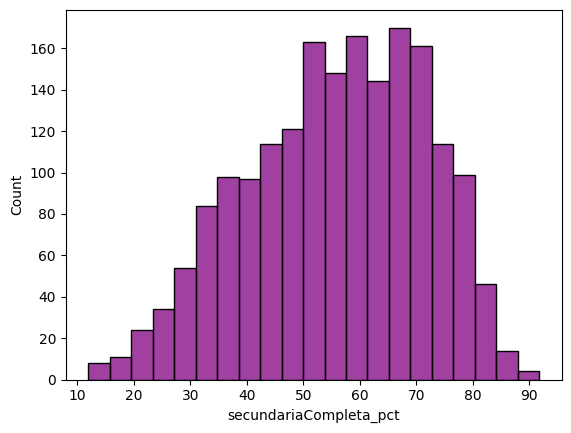

In [272]:
import seaborn as sea

sea.histplot(disMapMerge.secundariaCompleta_pct, color='purple')

### 2. Decide which is the  best classification scheme for that variable.

In [294]:
import mapclassify 
import numpy as np

# let's try 5 intervals
K=5
theVar=disMapMerge['secundariaCompleta_pct']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

In [307]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['Classifier'] = [c.name for c in class5]

# see the value
adcms

,0,Classifier
0,5901.939889,Quantiles
1,6835.047503,EqualInterval
2,11006.290432,StdMean
3,9468.638129,HeadTailBreaks
4,23882.204819,MaximumBreaks
5,5948.531638,FisherJenks
6,5838.370127,JenksCaspall
7,7578.338346,MaxP


In [308]:
# rename
adcms.rename(columns = {0:'ADCM'},inplace=True)
adcms=adcms.sort_values('ADCM').reset_index()
adcms

,index,ADCM,Classifier
0,6,5838.370127,JenksCaspall
1,0,5901.939889,Quantiles
2,5,5948.531638,FisherJenks
3,1,6835.047503,EqualInterval
4,7,7578.338346,MaxP
5,3,9468.638129,HeadTailBreaks
6,2,11006.290432,StdMean
7,4,23882.204819,MaximumBreaks


<Axes: xlabel='ADCM', ylabel='Classifier'>

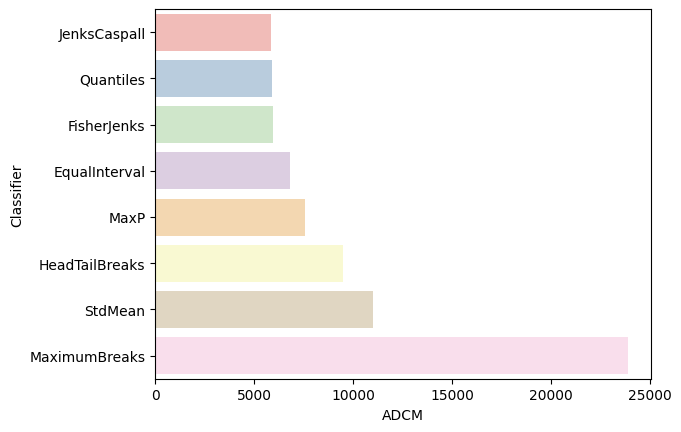

In [309]:
# reorder and plot
sea.barplot(y='Classifier', hue='Classifier', x='ADCM', data=adcms, palette='Pastel1')

In [297]:
# Mantenemos el menor valor del ADCM
disMapMerge['secComp_jc5'] = jc5.yb

In [298]:
disMapMerge.head()

,provDist,Provincia,Distrito,Poblacion,secundariaCompleta_pct,sinServHigiene_pct,geometry,secComp_jc5,secComp_jc4
0,Abancay+Abancay,Abancay,Abancay,56871,78.865450,2.9,"POLYGON ((1043456.374 578809.517, 1043472.076 ...",4,3
1,Bolognesi+Abelardo Pardo Lezameta,Bolognesi,Abelardo Pardo Lezameta,1263,50.434603,25.4,"POLYGON ((589625.329 950159.105, 589731.729 95...",1,1
2,Caraveli+Acari,Caraveli,Acari,3010,56.273614,8.8,"POLYGON ((855604.724 408148.590, 855990.585 40...",2,1
3,Ocros+Acas,Ocros,Acas,1057,72.527156,67.6,"POLYGON ((576776.387 934936.983, 576726.618 93...",4,3
4,Paruro+Accha,Paruro,Accha,3839,64.586647,11.1,"POLYGON ((1164542.373 533562.907, 1164551.644 ...",3,2


### 3. Make a map for the best scheme.

In [299]:
disMapMerge[['secComp_jc5']].isna().any()

secComp_jc5    False
dtype: bool

C:\Users\pieri\anaconda3\envs\miamb\Lib\site-packages\mapclassify\classifiers.py:2123: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  q = quantile(x, k)
C:\Users\pieri\anaconda3\envs\miamb\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pieri\anaconda3\envs\miamb\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


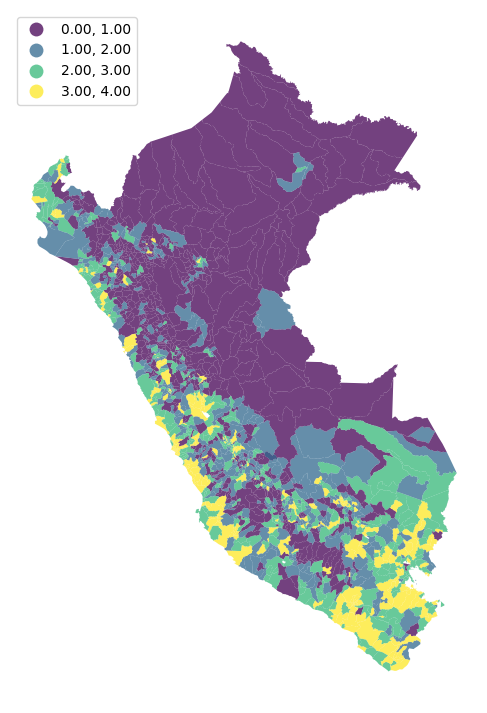

In [300]:
f, ax = plt.subplots(1, figsize=(9, 9))
disMapMerge.plot(column='secComp_jc5', 
        cmap='viridis',       
        scheme='JenksCaspall',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

### 4. Make a histogram for the best scheme.

In [310]:
jc5

JenksCaspall

   Interval      Count
----------------------
[11.97, 39.19] |   329
(39.19, 50.77] |   348
(50.77, 61.15] |   439
(61.15, 71.31] |   421
(71.31, 91.74] |   337

In [312]:
# etiqueta de cada grupo
np.unique(jc5.yb,return_counts=True)

(array([0, 1, 2, 3, 4]), array([329, 348, 439, 421, 337], dtype=int64))

In [313]:
pd.Series(jc5.yb).value_counts()

2    439
3    421
1    348
4    337
0    329
Name: count, dtype: int64

In [314]:
jc5.bins

array([39.19413594, 50.76999104, 61.15310816, 71.31262693, 91.7448777 ])

In [316]:
jc5_bins = list(jc5.bins)
jc5_bins.insert(0,disMapMerge.secundariaCompleta_pct.min())

<Axes: xlabel='secundariaCompleta_pct', ylabel='Count'>

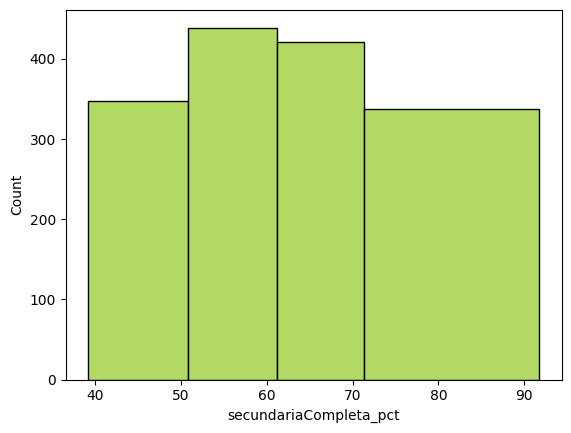

In [318]:
sea.histplot(disMapMerge.secundariaCompleta_pct,bins = jc5_bins, color = 'yellowgreen')

## Exercise 7

        
#### Compute the neighbors of the capital of your country. Plot the results for each of the options.

In [362]:
disMapProv = disMapMerge.dissolve(by='Provincia')
disMapProv.reset_index(inplace=True)
disMapProv.head()

,Provincia,geometry,provDist,Distrito,Poblacion,secundariaCompleta_pct,sinServHigiene_pct,secComp_jc5,secComp_jc4
0,Abancay,"POLYGON ((1033050.673 516632.386, 1032734.013 ...",Abancay+Abancay,Abancay,56871,78.865450,2.9,4,3
1,Acobamba,"POLYGON ((882534.168 667005.909, 882691.469 66...",Acobamba+Acobamba,Acobamba,10258,62.337880,10.3,3,2
2,Acomayo,"POLYGON ((1204182.279 514473.605, 1204108.221 ...",Acomayo+Acomayo,Acomayo,5627,60.402557,12.4,2,2
3,Aija,"POLYGON ((544922.552 997945.997, 544870.523 99...",Aija+Aija,Aija,1841,63.469151,6.0,3,2
4,Alto Amazonas,"POLYGON ((772697.921 1435431.207, 772670.572 1...",Alto Amazonas+Balsapuerto,Balsapuerto,18042,11.974433,85.3,0,0


In [320]:
from libpysal.weights import Queen, Rook, KNN

In [363]:
w_rook = Rook.from_dataframe(disMapProv,use_index=False) 

In [364]:
w_queen = Queen.from_dataframe(disMapProv,use_index=False)

In [365]:
# vecinos cercanos
w_knn = KNN.from_dataframe(disMapProv, k=4)

In [366]:
disMapProv[disMapProv.Provincia=='Lima']

,Provincia,geometry,provDist,Distrito,Poblacion,secundariaCompleta_pct,sinServHigiene_pct,secComp_jc5,secComp_jc4
112,Lima,"MULTIPOLYGON (((609754.267 733754.003, 609739....",Lima+Ancon,Ancon,42124,72.117976,1.1,4,3


In [367]:
# numero de vecinos del distrito
len(w_rook.neighbors[112])

5

In [368]:
disMapProv.iloc[w_rook.neighbors[112],]

,Provincia,geometry,provDist,Distrito,Poblacion,secundariaCompleta_pct,sinServHigiene_pct,secComp_jc5,secComp_jc4
34,Canta,"POLYGON ((652286.478 805483.483, 652291.680 80...",Canta+Arahuay,Arahuay,796,68.863361,26.6,3,3
88,Huaral,"POLYGON ((616018.926 819854.233, 615874.050 81...",Huaral+Atavillos Alto,Atavillos Alto,626,68.096533,40.6,3,2
43,Cañete,"POLYGON ((662998.713 639994.369, 662938.126 64...",Cañete+Asia,Asia,9902,82.237520,1.2,4,3
28,Callao,"POLYGON ((592120.513 754133.804, 592135.929 75...",Callao+Bellavista,Bellavista,72625,77.639226,0.0,4,3
92,Huarochiri,"POLYGON ((669820.636 725103.909, 669751.806 72...",Huarochiri+Antioquia,Antioquia,1246,64.779919,17.4,3,2


<Axes: >

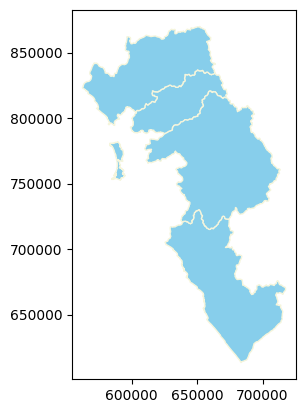

In [369]:
disMapProv.iloc[w_rook.neighbors[112] ,].plot(facecolor="skyblue",edgecolor='beige')

In [370]:
base = disMapProv[disMapProv.Departamento=="Lima"].plot(facecolor='gray')
disMapProv.iloc[w_rook.neighbors[112] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
disMapProv[disMapProv.Provincia=='Lima'].plot(ax=base,facecolor="red")

AttributeError: 'GeoDataFrame' object has no attribute 'Departamento'

<Axes: >

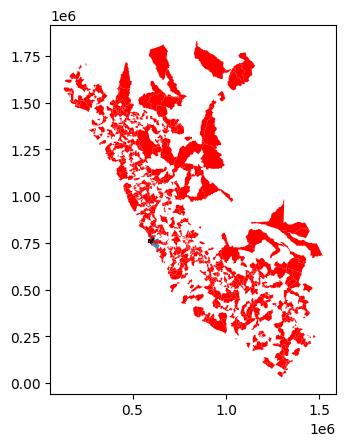

In [346]:
# see whole area
base=disMapMerge[disMapMerge.Provincia=="Lima"].plot()
disMapMerge.iloc[w_rook.neighbors[842] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
disMapMerge.head(842).plot(ax=base,facecolor="red")

## Exercise 8

    
### 1. Compute the Moran's coefficient for **all** your numeric variables.
    

### 2. Make a scatter plot for each variable.

## Exercise 9

### 1. Compute the Local Moran for the variables in your data that have significant spatial correlation.
    

### 2. Create a new column for each of those variables, with a label ('0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier').

### 3. Prepare a map for each of the variables analyzed, showing the spots and outliers.